# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [62]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [63]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [140]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

init = State(x = r_0, y = 0 * m, vx = 0 * m/s, vy = 0 * m/s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,0.0 meter / second


In [141]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e9 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1000000000.0 second


In [142]:
%psource ModSimVector

In [159]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    
    x, y, vx, vy = state
    
    position = Vector(x,y)
    force = system.G * system.m1 * system.m2 / position.mag2
    fx = -1 * force * math.cos(position.angle)
    fy = -1 * force * math.sin(position.angle)
    force_vector = Vector(fx, fy)
    return force_vector


In [160]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [161]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of x, y, vx, and vy
    """    
    x, y, vx, vy = state
    
    print('Velocity: ', vx, '   Position: ', x)
    
    dxdt = vx
    dydt = vy
    
    dvdt = universal_gravitation(state, system) / system.m2
    dvxdt = dvdt.x
    dvydt = dvdt.y
    
    return dxdt, dydt, dvxdt, dvydt

In [162]:
# Always test the slope function!

slope_func(init, 0, system)

Velocity:  0.0 meter / second    Position:  147000000000.0 meter


(<Quantity(0.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [163]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, dx, dy = state
    position = Vector(x, y)
    return position.mag - system.r_final

In [164]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [165]:
system.init

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,0.0 meter / second


In [166]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

Velocity:  0.0    Position:  147000000000.0
Velocity:  -9.999999999999931e-06    Position:  147000000000.0
Velocity:  -9.816237276781519e-05    Position:  147000000000.0
Velocity:  -0.00014724355915172278    Position:  147000000000.0
Velocity:  -0.0003926494910712605    Position:  147000000000.0
Velocity:  -0.00043627721230140096    Position:  146999999999.99997
Velocity:  -0.0004908118638390755    Position:  146999999999.99997
Velocity:  -0.0004908118638390759    Position:  146999999999.99997
Velocity:  -0.001472435591517228    Position:  146999999999.99988
Velocity:  -0.001963247455356305    Position:  146999999999.99966
Velocity:  -0.0044173067745517346    Position:  146999999999.9984
Velocity:  -0.004853583986853189    Position:  146999999999.99808
Velocity:  -0.005398930502229952    Position:  146999999999.99762
Velocity:  -0.005398930502229893    Position:  146999999999.99762
Velocity:  -0.015215167779011728    Position:  146999999999.98898
Velocity:  -0.020123286417403942    Pos

Velocity:  -557348.6813039919    Position:  596182239.3905915
Velocity:  -588649.6992491267    Position:  412104617.35956454
Velocity:  -802626.3832497597    Position:  465832881.3258345
Velocity:  -416227.60286457604    Position:  1517680587.256606
Velocity:  -424772.8336670748    Position:  1462146898.836264
Velocity:  -473882.37739077164    Position:  1170909728.8382359
Velocity:  -483651.27752741356    Position:  1109048294.355523
Velocity:  -498579.12378642    Position:  1039482628.0773228
Velocity:  -501918.3539546155    Position:  1049186604.8965834
Velocity:  -557046.9987765143    Position:  819733001.2128632
Velocity:  -624190.8393818706    Position:  676653680.7072916
Velocity:  -1441923.8682043338    Position:  -391915144.9510056
Velocity:  -3163834.0471127112    Position:  -629929094.404293
Velocity:  -1990366.3968898864    Position:  -165622787.92251837
Velocity:  1663371.4259184944    Position:  -106514976.38795578
Velocity:  -524317.7799932974    Position:  955956868.493

,values
sol,None
t_events,[[5432693.150108825]]
nfev,182
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [167]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(5432693.150108825, 'second')>

In [168]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(62.87839294107435, 'day')>

In [14]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

In [15]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [16]:
# Scaling the distance to million km

r = results.r / 1e9;

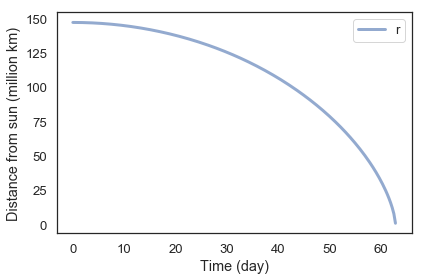

In [17]:
# And plotting

plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')